# 分析結果のあれこれ

In [36]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 37.5 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=b039bd8651976b50f5901ce97e394c4372533f4aae151eb990f99f51da40e27f
  Stored in directory: /home/ec2-user/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [59]:
import os
import csv
import pandas as pd
from glob import glob
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

関数を定義

In [151]:
def extract_filename_without_extension(filepath):
    # ファイルパスの最後の要素（ファイル名）を取得
    filename = os.path.basename(filepath)

    # ファイル名から拡張子を除去
    filename_without_extension = os.path.splitext(filename)[0]

    return filename_without_extension


def analysis_anomaly_df(result_path, output_path):
    dir_area = extract_filename_without_extension(output_path)

    # 異常検出結果を読み込む
    df = pd.read_csv(result_path)

    # 異常検出結果を標準出力する
    # 表示が不要な場合は、コメントアウトする
    log_path = f"output/EDA_result/{dir_area}_log.csv"
    image_list = sorted(df['image_name'].unique())

    data = [
        [f"線区フォルダ名: {dir_area}", "", "", ""],
        [f"対象画像：{len(image_list)}枚", "", "", ""],
        ["画像ファイル名", "Twins電柱番号", "異常_開始キロ程", "異常_終了キロ程"]
    ]

    with open(log_path, "w", newline='', encoding='shift-jis') as file:
        writer = csv.writer(file)
        for image_name in image_list:
            # print(f"{image_name} >>> キロ程範囲 {df[df['image_name'] == image_name]['kiro_tei'].min()} ～ {df[df['image_name'] == image_name]['kiro_tei'].max()}\n")
            data.append([
                f"{image_name}",
                int(df[df['image_name'] == image_name]['pole_num'].unique()[0]),
                df[df['image_name'] == image_name]['kiro_tei'].min(),
                df[df['image_name'] == image_name]['kiro_tei'].max()
            ])
        # データを一行ずつ書き込む
        for row in data:
            writer.writerow(row)
    print(f"異常検出結果を {log_path} に出力しました")

    # もとの解析結果を読み込む
    df_output = pd.read_csv(output_path)

    # 異常検出結果があるかを基のデータフレームに追記する
    df_output['Anomaly'] = False
    # df_output の ix 列の値が df の ix 列のいずれかの値と一致する場合、Anomaly を True に設定
    df_output.loc[df_output['ix'].isin(df['ix']), 'Anomaly'] = True

    # グラフを出力する
    create_graph(df, df_output, output_path)


def create_graph(df, df_output, output_path):
    dir_area = extract_filename_without_extension(output_path)

    # フォントサイズ変更
    plt.rcParams["font.size"] = 18

    # プロットの作成
    plt.figure(figsize=(20, 8))  # グラフのサイズを設定

    # estimated_width の線グラフをプロット
    plt.plot(df_output['kiro_tei'], df_output['estimated_width'], label='Estimated Width')

    # Anomaly が True の点を赤丸でプロット
    anomalies = df_output[df_output['Anomaly'] == True]
    plt.scatter(anomalies['kiro_tei'], anomalies['estimated_width'], color='red', s=50, label='Anomaly')

    # グラフの設定
    plt.xlabel('キロ程(km)')
    plt.ylabel('画像におけるトロリ線摺動面幅(px)')
    plt.title(f'摺動面幅での異常検出結果: {dir_area}')
    plt.legend()

    # グリッドの追加
    plt.grid(True, linestyle='--', alpha=0.7)

    # x軸の目盛りを調整（必要に応じて）
    plt.xticks(rotation=45)

    # グラフのレイアウトを調整
    plt.tight_layout()

    # グラフを画像として保存
    save_path = f'output/EDA_result/{dir_area}_width.png'
    plt.savefig(save_path)
    print(f"グラフを {save_path} に出力しました")

    # グラフを表示
    plt.show()

print("準備OK")

準備OK


対象のファイルを指定する

In [152]:
# ファイルリストを取得し、ソート
file_list = sorted(glob("output/*.csv"))

# 結果ファイルと異常摩耗検出のファイルを分類
output_list = [fpath for fpath in file_list if "result" not in fpath]
result_list = [fpath for fpath in file_list if "result" in fpath]

print("ファイルパス")
print(f"画像→摺動面 検出結果 ファイル数: {len(output_list)}")
pprint(output_list)
print("---")
print(f"異常摩耗 検出結果 ファイル数: {len(result_list)}")
pprint(result_list)
print("---")

ファイルパス
画像→摺動面 検出結果 ファイル数: 10
['output/Joban_001_Toride-st_down_20240402_day_HD21_output.csv',
 'output/Joban_001_Toride-st_down_20240402_day_HD22_output.csv',
 'output/Joban_001_Toride-st_up_20240402_day_HD21_output.csv',
 'output/Joban_001_Toride-st_up_20240402_day_HD22_output.csv',
 'output/Joban_002_Toride-Fujishiro_down_20240402_day_HD21_output.csv',
 'output/Joban_002_Toride-Fujishiro_down_20240402_day_HD22_output.csv',
 'output/Joban_002_Toride-Fujishiro_up_20240402_day_HD21_output.csv',
 'output/Takasaki_19_Gyouda-Kumagaya_down_20240508_day_HD21_output.csv',
 'output/Takasaki_19_Gyouda-Kumagaya_down_20240508_day_HD22_output.csv',
 'output/Takasaki_19_Gyouda-Kumagaya_up_20240509_day_HD22_output.csv']
---
異常摩耗 検出結果 ファイル数: 9
['output/result_HD21_Joban_001_Toride-st_down_20240402_day.csv',
 'output/result_HD21_Joban_001_Toride-st_up_20240402_day.csv',
 'output/result_HD21_Joban_002_Toride-Fujishiro_down_20240402_day.csv',
 'output/result_HD21_Joban_002_Toride-Fujishiro_up_20240402_d

In [153]:
result_list[0]

'output/result_HD21_Joban_001_Toride-st_down_20240402_day.csv'

In [154]:
def extract_info(file_path):
    # より汎用的な正規表現パターンを定義
    pattern = r'output/result_HD\d+_(.*?)\.csv'

    # パターンにマッチする部分を抽出
    match = re.search(pattern, file_path)

    if match:
        # マッチした部分（グループ1）を返す
        return match.group(1)
    else:
        # マッチしない場合はNoneを返す
        return None

dir_list = []
for result_path in result_list:
    dir_list.append(extract_info(result_path))
dir_list = sorted(list(set(dir_list)))

print("異常摩耗検出結果がある線区名👇")
pprint(dir_list)

異常摩耗検出結果がある線区名👇
['Joban_001_Toride-st_down_20240402_day',
 'Joban_001_Toride-st_up_20240402_day',
 'Joban_002_Toride-Fujishiro_down_20240402_day',
 'Joban_002_Toride-Fujishiro_up_20240402_day',
 'Takasaki_19_Gyouda-Kumagaya_down_20240508_day']


In [155]:
# メモ用、いずれは自動処理にする？
# 解析した線区名・カメラ番号のリスト
[
    ["Joban_001_Toride-st_down_20240402_day", "HD21"],
    ["Joban_001_Toride-st_down_20240402_day", "HD22"],
    ["Joban_001_Toride-st_up_20240402_day", "HD21"],
    ["Joban_001_Toride-st_up_20240402_day", "HD22"],
    ["Joban_002_Toride-Fujishiro_down_20240402_day", "HD21"],
    ["Joban_002_Toride-Fujishiro_down_20240402_day", "HD22"],
    ["Joban_002_Toride-Fujishiro_up_20240402_day", "HD21"],
    # ["Takasaki_19_Gyouda-Kumagaya_down_20240508_day", "HD21"]    # Result がおかしい
]

[['Joban_001_Toride-st_down_20240402_day', 'HD21'],
 ['Joban_001_Toride-st_down_20240402_day', 'HD22'],
 ['Joban_001_Toride-st_up_20240402_day', 'HD21'],
 ['Joban_001_Toride-st_up_20240402_day', 'HD22'],
 ['Joban_002_Toride-Fujishiro_down_20240402_day', 'HD21'],
 ['Joban_002_Toride-Fujishiro_down_20240402_day', 'HD22'],
 ['Joban_002_Toride-Fujishiro_up_20240402_day', 'HD21']]

## 異常摩耗の検出結果とグラフを作成する

In [160]:
dir_area = "Joban_001_Toride-st_down_20240402_day"
# dir_area = "Joban_001_Toride-st_up_20240402_day"
# dir_area = "Joban_002_Toride-Fujishiro_down_20240402_day"
# dir_area = "Joban_002_Toride-Fujishiro_up_20240402_day"
# dir_area = "Takasaki_19_Gyouda-Kumagaya_down_20240508_day"
camera_num = "HD22"

output_key = f"{dir_area}_{camera_num}"
resulut_key = f"{camera_num}_{dir_area}"

output_path = [fpath for fpath in output_list if output_key in fpath]
result_path = [fpath for fpath in result_list if resulut_key in fpath]
print("👇リストが空の場合は、線区・カメラ番号を指定しなおす")
print(f"{output_path=}")
print(f"{result_path=}")

👇リストが空の場合は、線区・カメラ番号を指定しなおす
output_path=['output/Joban_001_Toride-st_down_20240402_day_HD22_output.csv']
result_path=['output/result_HD22_Joban_001_Toride-st_down_20240402_day.csv']


異常検出結果を output/EDA_result/Joban_001_Toride-st_down_20240402_day_HD22_output_log.csv に出力しました


/tmp/ipykernel_9410/1498089912.py:44: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df_output = pd.read_csv(output_path)


グラフを output/EDA_result/Joban_001_Toride-st_down_20240402_day_HD22_output_width.png に出力しました


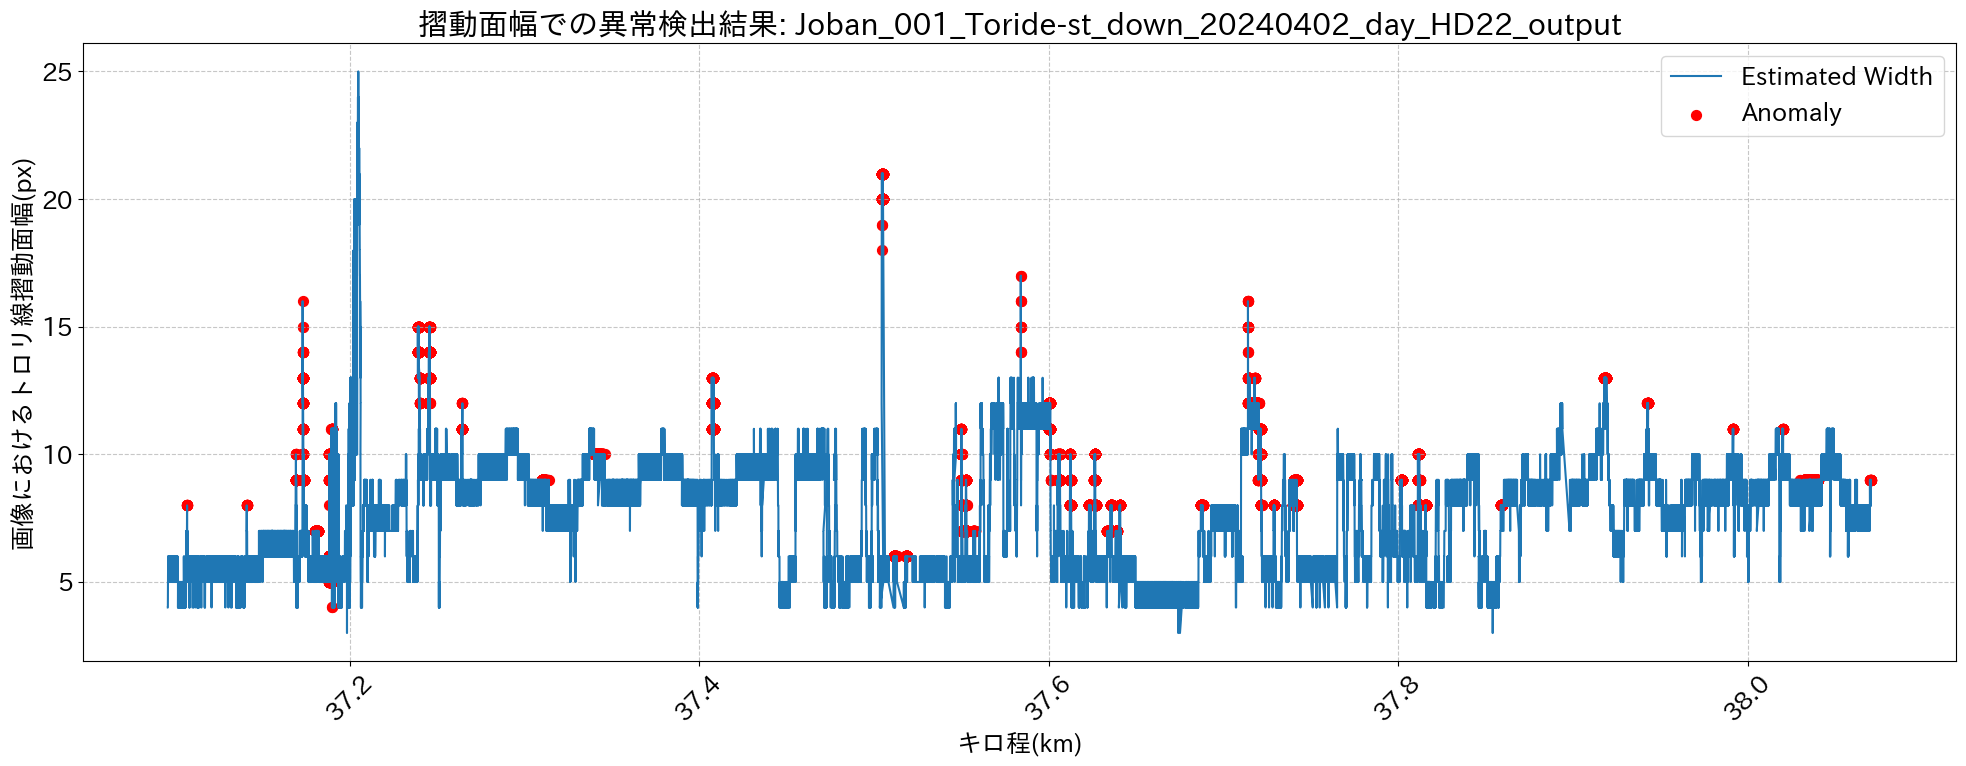

In [161]:
# ファイルパスを指定してグラフ化する
analysis_anomaly_df(result_path[0], output_path[0])

# (摩耗台帳チェック用)HD21,HD22を結合
対象ファイルが無い場合はエラーになります<br />
(例)HD21 と HD22 の両方の結果が無い　等

In [163]:
eda_results = sorted(glob("output/EDA_result/*.csv"))
eda_results = [path.replace("output/EDA_result/", "") for path in eda_results]
eda_results = [path.replace("_output_log.csv", "") for path in eda_results]
eda_results

['Joban_001_Toride-st_down_20240402_day_HD21',
 'Joban_001_Toride-st_down_20240402_day_HD22',
 'Joban_001_Toride-st_down_20240402_day',
 'Joban_001_Toride-st_up_20240402_day_HD21',
 'Joban_001_Toride-st_up_20240402_day_HD22',
 'Joban_002_Toride-Fujishiro_down_20240402_day_HD21',
 'Joban_002_Toride-Fujishiro_down_20240402_day_HD22',
 'Joban_002_Toride-Fujishiro_up_20240402_day_HD21',
 'Takasaki_19_Gyouda-Kumagaya_down_20240508_day_HD21',
 'Takasaki_19_Gyouda-Kumagaya_down_20240508_day_HD22']

In [165]:
def create_schema(file_list):
    schema = {}
    
    for file in file_list:
        # HDタグを抽出
        hd_tag = re.search(r'(HD\d+)$', file)
        
        # HDタグがある場合は、それを除いたキーを作成
        if hd_tag:
            key = file[:-(len(hd_tag.group()) + 1)]  # '_'も除く
            hd = hd_tag.group()
        else:
            key = file
            hd = None
        
        # キーが辞書に存在しない場合は新しいリストを作成
        if key not in schema:
            schema[key] = []
        
        # HDタグがある場合のみリストに追加
        if hd:
            schema[key].append(hd)
    
    # 重複を削除し、ソート
    for key in schema:
        schema[key] = sorted(list(set(schema[key])))
    
    return schema

eda_result_dict = create_schema(eda_results)
print('これまでに作成した異常値検出結果👇')
pprint(eda_result_dict)

これまでに作成した異常値検出結果👇
{'Joban_001_Toride-st_down_20240402_day': ['HD21', 'HD22'],
 'Joban_001_Toride-st_up_20240402_day': ['HD21', 'HD22'],
 'Joban_002_Toride-Fujishiro_down_20240402_day': ['HD21', 'HD22'],
 'Joban_002_Toride-Fujishiro_up_20240402_day': ['HD21'],
 'Takasaki_19_Gyouda-Kumagaya_down_20240508_day': ['HD21', 'HD22']}


駅区間単位でのデータフレームを作成して、CSVで出力する

In [167]:
# 線区名・カメラ番号を指定
dir_area = "Joban_001_Toride-st_down_20240402_day"
camera_nums = ["HD21", "HD22"]

# ひとつのデータフレームにまとめる
dfs = []
for camera_num in camera_nums:
    df_temp = pd.read_csv(f"output/EDA_result/{dir_area}_{camera_num}_output_log.csv", header=2, encoding="shift-jis")
    dfs.append(df_temp)
df = pd.concat(dfs, axis=0)

csv_path = f"output/EDA_result/{dir_area}_output_log.csv"
df.to_csv(csv_path, encoding="shift-jis", index=False)
print(f'HD21-HD22 を結合した結果を {csv_path} に出力しました')

HD21-HD22 を結合した結果を output/EDA_result/Joban_001_Toride-st_down_20240402_day_output_log.csv に出力しました
